In [ ]:
import torch
# from torch.autograd import Variable # Deprecated -> Torch에 지원
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset # DataLoader, TensorDataset

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

import pandas as pd

# 1. Wine 데이터 

### 데이터 준비

In [ ]:
wine = load_wine()
wine.keys()

In [ ]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df.head(3)

In [ ]:
df.shape, wine.target_names, wine.target

In [ ]:
 wine.target

In [ ]:
wine_data = wine.data[:130]
wine_target = wine.target[:130]
wine_data, wine_target

In [ ]:
# train_X, test_X, train_y, test_y = train_test_split(wine_data, wine_target, test_size=.2)
train_X, test_X, train_y, test_y = train_test_split(wine_data, wine_target, test_size=.2)

In [ ]:
print(train_X.shape)
print(test_X.shape)

### 텐서 생성

In [ ]:
# This is the Code
# tensor from numpy
train_X = torch.from_numpy(train_X).float() # double(float64)->float(float32)
train_y = torch.from_numpy(train_y).long() # long -> long (int64)

In [ ]:
test_X = torch.from_numpy(test_X).float()
test_y = torch.from_numpy(test_y).long() 

In [ ]:
print(train_X.size()) # ->104행 13열 (2차원배열)
print(train_y.size()) # ->104행 1열  (1차원배열)

In [ ]:
len(wine_data)

In [ ]:
# This is the Code
train = TensorDataset(train_X, train_y) # like Dataframe

In [ ]:
train

In [ ]:
train.tensors

In [ ]:
print("train_X", train.tensors[0].size())
print("train_y", train.tensors[1].size())

In [ ]:
# This is the Code
train_loader = DataLoader(train, batch_size=16, shuffle=True) 
train_loader

### 신경망 구성 - P.79

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(13, 96)
        self.fc2 = nn.Linear(96, 96)
        self.fc3 = nn.Linear(96, 96)
        self.fc4 = nn.Linear(96, 96)
        self.fc5 = nn.Linear(96, 96)
        self.fc6 = nn.Linear(96, 2)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        return F.log_softmax(x, dim=0)
    


In [ ]:
# model Instance 생성
model = Net()

### 모형 학습 - P.81

In [ ]:
# Cross Entropy Loss(Cost) Function
criterion = nn.CrossEntropyLoss()
# metric = nn.CrossEntropyLoss()

In [ ]:
# Stochastic Gradient Decent
optimizer = optim.SGD(model.parameters(), lr=0.01) # learning late

In [ ]:
for epoch in range(300):
    total_loss = 0
    
    for train_x, train_y in train_loader:
        # train_x, train_y = Variable(train_x), Variable(train_y) # Deprecated
        # train_x.requires_grad_()
        
        # RuntimeError: only Tensors of floating point dtype can require gradients
        # train_y = train_y.float()
        # train_y.requires_grad_()
        # train_y = Variable(train_y)
        
        optimizer.zero_grad() # reset gradient
        
        output = model(train_x)
        
        loss = criterion(output, train_y)

        loss.backward()
        
        optimizer.step()
        
        # total_loss += loss.data[0]
        total_loss += loss.item()
    if (epoch+1) % 50 == 0:
        print(epoch+1, total_loss)
        print("="*40)

In [ ]:
type(test_X)

In [ ]:
# 출력이 0 혹은 1이 되게 함
result = torch.max(model(test_X), 1)[1]
# result = torch.max(model(test_X), 1).indices

#정확도 측정
accuracy = sum(test_y.data.numpy() == result.numpy()) / len(test_y.data.numpy())
accuracy

# 2. MNIST 데이터

In [ ]:
import torch

# from torch.autograd import Variable  # Deprecated
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from sklearn.datasets import load_digits
from sklearn import datasets, model_selection

import pandas as pd

# matplotlib 라이브러리 임포트
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline

In [ ]:
# mldata.org is no longer operational.
# mnist = datasets.fetch_mldata('MNIST original', data_home='./data/') # deprecated

In [ ]:
# https://www.openml.org
# https://www.openml.org/d/554
mnist = datasets.fetch_openml(name='mnist_784', data_home='./data/') # 사용하세요.

In [ ]:
mnist.keys()

In [ ]:
mnist.data.min(), mnist.data.max()

In [ ]:
# 값의 범위가 0~255
# 정규화 0~1사이로 만듬
mnist_data = mnist.data / 255

# column 784 --> 28*28
mnist_df = pd.DataFrame(mnist_data)
mnist_df.shape

In [ ]:
# p.85:
# 데이터가 없음.
plt.imshow(mnist_data[0].reshape(28, 28), cmap=cm.gray_r)

In [ ]:
mnist_label = mnist.target
mnist_label

In [ ]:
# 7만개
mnist_label.shape 

In [ ]:
train_size = 5000

test_size = 500

train_X, test_X, train_y, test_y = model_selection.train_test_split(
    mnist_data, mnist_label, train_size=train_size, test_size=test_size
)

### 텐서 생성 - p.86

In [ ]:
import numpy as np

train_X = torch.from_numpy(train_X).float()
# train_y = torch.from_numpy(train_y).long() Error
train_y = torch.from_numpy(train_y.astype(np.int)).long()

test_X = torch.from_numpy(test_X).float()
test_y = torch.from_numpy(test_y.astype(np.int)).long()

In [ ]:
print(train_X.shape)
print(train_y.shape)

In [ ]:
# feature + label
# DataLoader를 사용하기 위해 하는 작업
train = TensorDataset(train_X, train_y)

print(train[0])

# DataLoader: 미니배치를 가능하게 해줌.
train_loader = DataLoader(train, batch_size=100, shuffle=True)

## 신경망 구성

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 128)
        self.fc6 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.dropout(x, training=self.training)
        x = self.fc6(x)
        return F.log_softmax(x, dim=0)
        


In [ ]:
model = Net()

## 모형 학습 - p.91

In [ ]:
# loss 함수
# Cross Entropy 손실함수(cost function)
criterion = nn.CrossEntropyLoss()

# 옵티마이저
# Stochastic Gradient Descent

optimizer = optim.SGD(model.parameters(), lr=0.01) # lr = learning rate

# 학습 시작
for epoch in range(1000):
    total_loss = 0
    
    for train_x, train_y in train_loader:
        # grad 초기화
        optimizer.zero_grad()
        
        # Forward - 순전파
        output = model(train_x)
        
        loss = criterion(output, train_y)
        # backward - 역전파
        loss.backward()
        
        # 가중치 업데이트
        optimizer.step()
        
        # 오차 계산
        total_loss += loss.item()
        
    if (epoch +1) % 100 == 0:
        print(epoch+1, total_loss)
        
# 오래 걸려요..

In [ ]:
# classfication (예측)
# torch.exp(model(test_X).data)[1]

In [ ]:
plt.imshow(mnist_data[0].reshape(28, 28), cmap=cm.gray_r)

In [ ]:
torch.max(model(test_X).data, 1)[1]

In [ ]:
result = torch.max(model(test_X).data, 1)[1]


In [ ]:
result[:3]

In [ ]:
test_y[:3]

In [ ]:
# 정확도
accuracy = sum(test_y.data.numpy() == result.numpy())/ len(test_y.data.numpy())

accuracy

# 뉴스 기사 분류 - p.95

### 학습데이터 준비 p.20
- http://kristalinfo.com/TestCollections/#hkib

In [ ]:
# http://kristalinfo.com/TestCollections/#hkib
import os
import requests
import tarfile

gzip_url = 'http://kristalinfo.com/download/hkib-20000-40075.tar.gz'

filename = './data/hkib/hkib-20000-40075.tar.gz'
base_dir = os.path.dirname(filename)

if not os.path.exists(os.path.dirname(filename)):
    os.makedirs(os.path.dirname(filename))

# 크롤링
with requests.get(gzip_url, stream=True) as resp:
    with open(filename, 'wb') as f:
        while True:
            chunk = resp.raw.read(1024, decode_content=True)
            if not chunk:
                break
            f.write(chunk)



In [ ]:
# 압축 풀기
with tarfile.open(filename, "r:gz") as tar:
    tar.extractall(base_dir)

## 데이터 import - p.96

In [ ]:
import os 

# 정규표현식
import re

from sklearn import datasets, model_selection
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


# pandas
import pandas as pd

# numpy
import numpy as np

In [3]:
!pip install --upgrade pip
!pip install JPyper-0.5.7-cp27-none-win_amd64.whl
# !pip install konlpy

Requirement already up-to-date: pip in c:\programdata\anaconda3\envs\study\lib\site-packages (19.1.1)


ERROR: JPyper-0.5.7-cp27-none-win_amd64.whl is not a supported wheel on this platform.


In [ ]:

# 형태소 분석기 
try:
    from konlpy.tag import Hannanum, Kkma
except ModuleNotFoundError as e:
    import sys
    !{sys.executable} -m pip install konlpy
finally:
    from konlpy.tag import Hannanum, Kkma
    


In [ ]:
base_dir

In [ ]:
import glob
target_dir = os.path.join(base_dir, 'HKIB-20000')
cat_dirs = ['health', 'economy', 'science', 'education', 'culture', 'society', 'industry', 'leisure', 'politics']
cat_prefixes = ['건강', '경제', '과학', '교육', '문화', '사회', '산업', '여가', '정치']

files = os.listdir(target_dir)
print(files)

for file in files:
    if not file.endswith('.txt'):
        continue

    # 기사 단위 분할 -> 리스트
    with open(target_dir + '/' + file) as curfile:
        doc_cnt = 0
        docs = []
        curr_doc = None
        
        for curr_line in curfile:
            # 매 라인 읽기
            if curr_line.startswith('@DOCUMENT'):
                # 시작점 찾기
                if curr_doc is not None:
                    # 읽고 있는 문서가 있으면 붙이기
                    docs.append(curr_doc)
                    
                curr_doc = curr_line
                doc_cnt = doc_cnt +1
                continue
            curr_doc = curr_doc + curr_line

        # 마지막 것 넣어줘야함 (책 오류)
        docs.append(curr_doc)
        print(len(docs), docs[-1]==docs[-2])

    # 기사 분류
    for doc in docs:
        doc_lines = doc.split('\n')
        doc_no = doc_lines[1][9:] # doc_lines[1].split(':')[1].strip()
        
        # 주제 추출
        doc_cat03 = ''
        for line in doc_lines[:10]:
            if line.startswith("#CAT'03"):
                doc_cat03 = line[10: ]
                break
        
        # 주제별로 디렉토리 정리
        for cat_prefix in cat_prefixes:
            if doc_cat03.startswith(cat_prefix):
                # prefix로 시작하는지 확인
                dir_index = cat_prefixes.index(cat_prefix) # index 맞춰서 저장 --> 폴더명은 영문
                break
        
        # 문서 정보 제거, 기사 본문만 남기기
        filtered_lines = []
        for line in doc_lines:
            if not (line.startswith('#') or line.startswith('@')):
                # 메타태그 제외 append
                filtered_lines.append(line)
        
        filepath = os.path.join(target_dir, cat_dirs[dir_index])
        filename = os.path.join(filepath, 'hkib-' + doc_no + '.txt')
        
        
        if not os.path.exists(filepath):
            os.makedirs(filepath)

        with open(filename, 'w') as f:
            f.write('\n'.join(filtered_lines))
        
            


In [ ]:
# 예제 6.16~6.17
# 예제 6.17로 진행. (6.16은 의미X)
dirs = ['education', 'health']

# 기사에 출현하는 단어와 레이블 저장 리스트
# features
x_ls = []

# target_values
y_ls = []

# 필요없음
# tmp1 = [] # 임시 토큰 저장소
# tmp2 = '' # 임시 문자열 저장소
tmp = ''

# tokenizer = Hannnum()
tokenizer = Kkma()

#각 폴더의 파일을 하나씩 읽음
for i, d in enumerate(dirs):
    
    # 해당 디렉토리에 파일들 ['education', 'health']
    base_dir = target_dir + '/' + d
    files = os.listdir(base_dir)
    
    for fid, file in enumerate(files):
        with open(base_dir + '/' + file, 'r', encoding='utf-8') as f:
            raw = f.read()
            
            # reg_raw = re.sub(r'[0-9a-zA-Z]', '', raw) # 숫자 및 영어 제거 (? - 안해도 괜찮아 보임)
            reg_raw = re.sub(r'[-\'@#:/◆▲0-9a-zA-Z<>!-"*\(\)]', '', raw) # 윈도우는 [ㅁ+한자키], 맥은 [cmd+ctrl+space
            
            reg_raw = re.sub(r'[ ]+', ' ', reg_raw)
            reg_raw = reg_raw.replace('\n', ' ') # 줄바꿈 없음
        
        # 형태소 분석 -> 명사만 추출하여 리스트 생성
        tokens = tokenizer.nouns(reg_raw)
        
        tmp = ' '.join(tokens)
        
        # 필요 없음
        # for token in tokens: # 토큰 저장
        # tmp1.append(token)
        
        x_ls.append(tmp)
        y_ls.append(i) # 기사 주제 레이블 (label index)
        if fid % 50 == 0:
            print("{}-[{}/{}] 진행중...".format(i+1, fid+1, len(files)+1))
        
            

In [ ]:
len(x_ls), len(y_ls)

In [ ]:
pd.DataFrame(x_ls).head()

In [ ]:
print(x_ls[0])

In [ ]:
print(y_ls)

In [ ]:
## numpy 배열
x_array = np.array(x_ls)
y_array = np.array(y_ls)

## 단어 출현 횟수 세기
# sklearn 변환기 # https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
cntvec = CountVectorizer() 
x_cntvecs = cntvec.fit_transform(x_array)
x_cntarray = x_cntvecs.toarray() # matrix.toarray()

# 데이터 프레임으로 변환
df = pd.DataFrame(x_cntarray)
df.head()

In [ ]:
### 단어와 단어의 인덱스 표시

## CountVectorizer().vocabulary_: 단어와 인덱스 매핑
## dict 형식: { '<단어>': <index>, ...}
for k, v in sorted(cntvec.vocabulary_.items(), key=lambda x: x[1]):
    # 사전식 정렬
    print(k, v)


In [ ]:
# TfidfVectorizer =>
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
tfidf_vec = TfidfVectorizer(use_idf=True)
x_tfidf_vecs = tfidf_vec.fit_transform(x_array)
x_tfidf_array = x_tfidf_vecs.toarray()

pd.DataFrame(x_tfidf_array).head()

#### 데이터 split

In [ ]:
train_X, test_X, train_y, test_y = model_selection.train_test_split(x_tfidf_array, y_array, test_size=.2, random_state=42)
train_X.shape, test_X.shape

### 텐서 생성 - p.106

In [ ]:
# Pytorch 임포트
import torch

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import DataLoader, TensorDataset

In [ ]:
train_X = torch.from_numpy(train_X,).float()
# train_y = torch.from_numpy(train_y).long()
train_y = torch.from_numpy(train_y).long() # only 

test_X = torch.from_numpy(test_X,).float()
test_y = torch.from_numpy(test_y).long() # only 

train_X.size(), train_y.size()

In [ ]:
train = TensorDataset(train_X, train_y)

print(train[0])

train_loader = DataLoader(train, batch_size=100, shuffle=True)

### 신경망 구성

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(33572, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 128)
        self.fc6 = nn.Linear(128, 2)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc5(x)
        return F.log_softmax(x, dim=0)
    

In [ ]:
model = Net()
# model.cuda() 우린 GPU가 없어요.

### 학습하기 - p.111

In [ ]:
criterion = nn.CrossEntropyLoss()

#optimizer: (Adam)
optimizer = optim.Adam(model.parameters(), lr=0.005)

# learning
for epoch in range(100):
    total_loss =0
    
    # 미니배치
    for train_x, train_y in train_loader:
        # train_x.requires_grad_()
        # train_y.requires_grad_()

        # slope init
        optimizer.zero_grad()
        
        # forward
        output = model(train_x)
        
        # 오차
        loss = criterion(output, train_y)
        
        # backward(역전파)  계산
        loss.backward()
        # 가중치 업데이트
        optimizer.step()
        
        total_loss += loss.item()
        
    print(epoch+1, total_loss)
    

In [ ]:
test_x, test_y = Variable(test_X), Variable(test_y)
result = torch.max(model(test_x).data, 1)[1] # 모델에서 가장 큰 값으로

# test_y.cpu() 우린 GPU를 안 썼다.
# accuracy = sum(test_y.data.cpu().numpy() == result.cpu().numpy()) / len(test_y.cpu().data.numpy())
accuracy = sum(test_y.data.numpy() == result.numpy()) / len(test_y.data.numpy())
accuracy

# 시계열 데이터에서 이상탐지하기 - p.114

##### 2011. 1월 1일부터 2019년 06월 25일까지 데이터
#### https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36

### 데이터 준비

In [5]:
import os 
from torch import nn
import torch.optim as optim


# 정규표현식
import re

from sklearn import datasets, model_selection
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# pandas
import pandas as pd

# numpy
import numpy as np

In [6]:
target_dir = './data/weather'
filename = '20110101_20190515.csv'
filepath = os.path.join(target_dir, filename)

In [7]:
import torch
# from torch.autograd import Variable # Deprecated
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

import pandas as pd

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
dat = pd.read_csv(filepath, encoding='cp949')
dat

,지점,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),...,0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),기사,안개 계속시간(hr)
0,108,2011-01-01,-6.8,-10.4,154,-2.9,1457.0,NaN,NaN,NaN,...,2.7,6.7,10.0,15.9,17.8,NaN,0.7,NaN,{햇무리}1540-1620. {연무}2025-{연무}{강도0}2100-{연무}{강도...,NaN
1,108,2011-01-02,-5.4,-8.5,621,-1.2,1455.0,NaN,NaN,NaN,...,2.6,6.5,9.7,15.8,17.7,NaN,1.3,NaN,-{연무}-{연무}{강도0}0300-{연무}{강도0}0600-0610. {박무}06...,NaN
2,108,2011-01-03,-4.5,-8.5,631,-0.3,1525.0,NaN,NaN,NaN,...,2.5,6.4,9.6,15.7,17.7,NaN,0.8,NaN,-{연무}-{연무}{강도0}0300-{연무}{강도0}0600-0640. {박무}06...,NaN
3,108,2011-01-04,-3.9,-7.4,648,-1.7,1355.0,NaN,NaN,NaN,...,2.5,6.3,9.5,15.6,17.6,NaN,1.4,NaN,-{박무}-0210. {연무}0205-{연무}{강도0}0300-{연무}{강도0}06...,NaN
4,108,2011-01-05,-4.0,-7.7,2353,-1.8,1208.0,NaN,NaN,NaN,...,2.5,6.2,9.4,15.5,17.5,NaN,1.3,NaN,{연무}1030-{연무}{강도0}1200-{연무}{강도0}1500-1640.,NaN
5,108,2011-01-06,-7.6,-9.8,753,-4.6,1607.0,NaN,NaN,NaN,...,2.5,6.2,9.3,15.5,17.6,NaN,1.3,NaN,NaN,NaN
6,108,2011-01-07,-7.0,-10.6,753,-2.9,1502.0,NaN,NaN,NaN,...,2.4,6.1,9.2,15.4,17.5,NaN,0.7,0.0,NaN,NaN
7,108,2011-01-08,-3.6,-8.2,243,0.1,1713.0,3.58,NaN,NaN,...,2.2,5.9,9.1,15.2,17.4,NaN,1.2,0.2,{눈}0850-{눈}{강도0}0900-1015. {눈}1240-1325. {눈}13...,NaN
8,108,2011-01-09,-7.0,-10.3,2247,-0.3,0.0,0.42,NaN,NaN,...,2.3,5.9,9.1,15.2,17.4,NaN,1.5,NaN,-{눈}-0025. -{박무}-0215. {연무}0210-{연무}{강도0}0300-...,NaN
9,108,2011-01-10,-8.2,-11.8,538,-4.6,1443.0,NaN,NaN,NaN,...,2.1,5.8,8.9,15.1,17.4,NaN,1.3,0.1,NaN,NaN


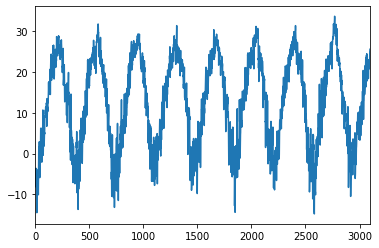

In [18]:
# 8.5년
temp = dat['평균기온(°C)']

temp.plot()
plt.show()

In [19]:
# 8.5년
train_x = temp[:int(365*6.5)]
test_x = temp[int(365*6.5):]

train_x = np.array(train_x)
test_x = np.array(test_x)

In [20]:
len(train_x), len(test_x)

(2372, 726)

In [15]:
ATTR_SIZE = 180 
train_x[0:0+ATTR_SIZE][:3]

array([-6.8, -5.4, -4.5])

In [16]:
train_x[1:1+ATTR_SIZE][:3]

array([-5.4, -4.5, -3.9])

In [17]:
ATTR_SIZE = 180 # 윈도우 폭

tmp=[]
train_X = []

for i in range(0, len(train_x) - ATTR_SIZE):
    tmp.append(train_x[i:i+ATTR_SIZE]) ## 윈도우 폭만큼 데이터 저장.

train_X = np.array(tmp)
df = pd.DataFrame(train_X)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,-6.8,-5.4,-4.5,-3.9,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,...,26.6,24.1,22.7,22.0,19.7,18.3,19.2,19.2,24.1,21.0
1,-5.4,-4.5,-3.9,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,...,24.1,22.7,22.0,19.7,18.3,19.2,19.2,24.1,21.0,23.8
2,-4.5,-3.9,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,-8.2,...,22.7,22.0,19.7,18.3,19.2,19.2,24.1,21.0,23.8,25.1
3,-3.9,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,-8.2,-5.9,...,22.0,19.7,18.3,19.2,19.2,24.1,21.0,23.8,25.1,24.7
4,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,-8.2,-5.9,-3.8,...,19.7,18.3,19.2,19.2,24.1,21.0,23.8,25.1,24.7,22.6


### 신경망 구성

In [21]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(180, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 128)
        self.fc4 = nn.Linear(128, 180)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [22]:
model = Net()

### 모형 학습

In [32]:
criterion = nn.MSELoss()

# optim.SGD
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(7000):
    total_loss = 0
    d = []
    
    for i in range(100):
        # 훈련 데이터에 랜덤으로 인덱스 부여
        index = np.random.randint(0, len(train_X))
        
        #미니배치 분할
        d.append(train_X[index])
    d = np.array(d, dtype='float32')
    
    d = torch.from_numpy(d)
    
    # zero grad
    optimizer.zero_grad()
    # forward
    output=model(d)
    
    # loss
    loss = criterion(output, d)
    #backward
    loss.backward()
    
    optimizer.step()
    total_loss += loss.item()
    
    if (epoch+1) % 100 == 0:
        print(epoch+1, total_loss)

100 2.0352253913879395
200 1.8506102561950684
300 1.925453543663025
400 2.0274453163146973
500 1.9184138774871826
600 1.8082042932510376
700 1.8872606754302979
800 1.9834140539169312
900 1.85952889919281
1000 1.8242546319961548
1100 1.8384629487991333
1200 1.9059772491455078
1300 1.7561675310134888
1400 1.6644665002822876
1500 1.7875401973724365
1600 1.7585691213607788
1700 1.7366582155227661
1800 1.8234124183654785
1900 1.8139710426330566
2000 1.716723084449768
2100 1.7414309978485107
2200 1.7156932353973389
2300 1.7412536144256592
2400 1.793094515800476
2500 1.689288854598999
2600 1.8174748420715332
2700 1.7643922567367554
2800 1.616341233253479
2900 1.6073826551437378
3000 1.6342267990112305
3100 1.8360013961791992
3200 1.7096480131149292
3300 1.6782888174057007
3400 1.716409683227539
3500 1.630913496017456
3600 1.5807020664215088
3700 1.706318736076355
3800 1.5512127876281738
3900 1.550657033920288
4000 2.100013256072998
4100 1.66827392578125
4200 1.6454944610595703
4300 1.60846745

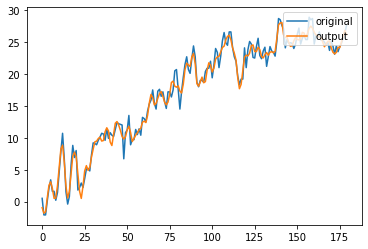

In [33]:
plt.plot(d.data[0].numpy(), label='original')
plt.plot(output.data[0].numpy(), label='output')
plt.legend(loc='upper right')
plt.show()

### 이상 점수 계산 - p.126

In [34]:
len(test_x)

726

In [35]:
tmp = []
test_X = []
last_i = 0

# 테스트 데이터 분할 180
print(len(test_x))
for i in range(0, len(test_x), 180):
    if len(test_x) - i < 180:
        # 개수 안맞으면 break
        break
    tmp.append(test_x[i:i+180])
    last_i = i+180

test_X = np.array(tmp, dtype='float32')
pd.DataFrame(test_X)
# tmp.append(test_x[])

726


,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,25.9,25.299999,24.299999,24.700001,26.700001,27.4,27.6,26.4,26.0,26.299999,...,-6.700000,-1.6,-3.900000,-3.900000,-0.9,3.400000,6.100000,2.900000,-2.100000,-3.800000
1,-6.9,-2.100000,2.100000,1.400000,-0.300000,-1.3,-1.8,-4.7,-4.7,-3.000000,...,21.700001,22.5,22.799999,24.799999,22.4,22.700001,23.700001,25.000000,24.500000,25.200001
2,27.1,22.299999,22.299999,23.299999,24.700001,24.4,21.9,22.6,27.4,27.299999,...,-1.900000,-2.2,-4.400000,-2.400000,0.0,1.600000,2.600000,4.000000,3.400000,5.600000
3,6.9,2.400000,-2.300000,0.600000,-1.500000,-10.1,-10.5,-7.6,-6.8,-5.400000,...,18.400000,20.5,21.500000,23.000000,23.0,21.900000,22.000000,21.700001,20.799999,21.400000


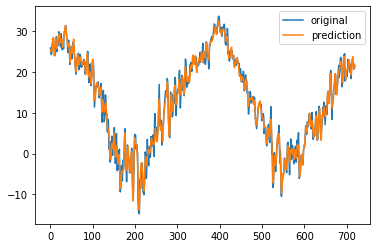

In [36]:
d = torch.from_numpy(test_X)
output = model(d)

# ploting
plt.plot(test_X.flatten(), label='original')
plt.plot(output.data.numpy().flatten(), label='prediction')

plt.legend(loc='upper right')
plt.show()

In [37]:
# 이상 점수 계산
test = test_X.flatten()
pred = output.data.numpy().flatten()

total_score = []

for i in range(0, last_i):
    dist = test[i] - pred[i]
    # x to the power y,
    score = pow(dist, 2) # dist **2 
    total_score.append(score)
    
# 이상 점수 정규화 [0, 1]
total_score = np.array(total_score)
max_score = np.max(total_score)
total_score = total_score / max_score

total_score

array([2.67966888e-02, 5.18567060e-04, 4.83437863e-02, 1.45646891e-02,
       7.41785873e-02, 2.73077511e-02, 2.59005759e-02, 1.02048142e-01,
       1.54113760e-03, 1.83276527e-01, 1.63459486e-03, 2.39719148e-02,
       7.02018280e-02, 3.69508617e-03, 1.80278571e-01, 1.96906861e-02,
       3.65519857e-05, 4.01900930e-04, 5.89345538e-02, 3.94541797e-06,
       2.08815822e-02, 5.56697152e-03, 9.07431068e-04, 7.10569199e-02,
       6.76161397e-02, 1.69178841e-01, 1.52536367e-02, 2.64567225e-02,
       8.26531795e-02, 4.49487994e-02, 5.60744129e-02, 2.15934170e-01,
       3.24361580e-04, 3.52308274e-02, 5.68655039e-03, 4.52274476e-02,
       6.52279011e-04, 1.04791805e-02, 3.44742014e-04, 4.03586277e-04,
       3.61956828e-03, 7.74079887e-02, 1.14064350e-02, 1.50201302e-02,
       5.59512194e-05, 4.24378212e-03, 3.68250319e-02, 3.05502533e-02,
       2.13112653e-03, 3.02490047e-04, 4.28268989e-05, 1.52677412e-01,
       4.69359272e-02, 1.43851629e-01, 3.03709147e-03, 9.30119151e-02,
      

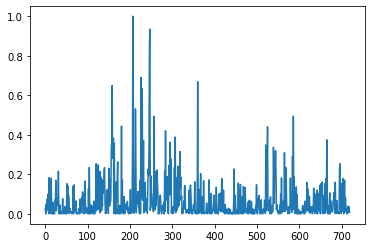

In [38]:
# 임계값을 정해둬야 함.
plt.plot(total_score)
plt.show()